In [1]:
import sys
import numpy as np
import tensorflow as tf

from train import Trainer
from dataset.data_reader import PoseDataReader

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Found horovod module, will use distributed training


In [2]:
from utils.parse_config import parse_config

cfg = parse_config('config.yaml')
data_cfg = cfg['data_config']
train_cfg = cfg['train_config']
model_cfg = cfg['model_config']

data_reader = PoseDataReader(data_cfg)

12it [00:00, 118.78it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...


206it [00:01, 106.04it/s]
  8%|▊         | 16/203 [00:00<00:01, 114.04it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Lab_April20_Recording_38.records


100%|██████████| 203/203 [00:00<00:00, 494.72it/s]
11it [00:00, 105.42it/s]

loading annotations into memory...
Done (t=0.03s)
creating index...


195it [00:01, 104.15it/s]
 14%|█▍        | 27/194 [00:00<00:00, 263.31it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Lab_April20_Recording_43.records


100%|██████████| 194/194 [00:00<00:00, 460.15it/s]
11it [00:00, 105.34it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...


203it [00:02, 101.01it/s]
  6%|▌         | 11/189 [00:00<00:01, 107.36it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Lab_April20_Recording_44.records


100%|██████████| 189/189 [00:07<00:00, 26.17it/s]
11it [00:00, 101.78it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...


157it [00:01, 104.86it/s]
 19%|█▉        | 30/154 [00:00<00:00, 169.00it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Lab_April20_Recording_45.records


100%|██████████| 154/154 [00:00<00:00, 196.12it/s]
12it [00:00, 112.21it/s]

loading annotations into memory...
Done (t=0.03s)
creating index...


186it [00:01, 104.98it/s]
  7%|▋         | 13/186 [00:00<00:01, 128.07it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Recordings_Location1_Recording_2.records


100%|██████████| 186/186 [00:01<00:00, 168.43it/s]
11it [00:00, 109.52it/s]

loading annotations into memory...
Done (t=0.03s)
creating index...


219it [00:02, 104.79it/s]
  6%|▌         | 12/199 [00:00<00:01, 115.34it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Recordings_Location1_Recording_3.records


100%|██████████| 199/199 [00:01<00:00, 192.87it/s]
11it [00:00, 100.56it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...


95it [00:00, 103.98it/s]
 13%|█▎        | 12/95 [00:00<00:00, 115.93it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Recordings_Location1_Recording_4.records


100%|██████████| 95/95 [00:00<00:00, 158.23it/s]
1it [00:00,  8.69it/s]

loading annotations into memory...
Done (t=0.01s)
creating index...


98it [00:02, 37.14it/s]
  7%|▋         | 4/58 [00:00<00:01, 30.71it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Recordings_Location2_Device1_s1.records


100%|██████████| 58/58 [00:01<00:00, 47.63it/s]
2it [00:00, 18.08it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...


40it [00:01, 31.29it/s]
  3%|▎         | 1/29 [00:00<00:04,  6.06it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Recordings_Location2_Device1_s2.records


100%|██████████| 29/29 [00:00<00:00, 55.91it/s]


loading annotations into memory...


10it [00:00, 95.75it/s]

Done (t=0.33s)
creating index...


5782it [01:19, 72.36it/s] 
  0%|          | 13/4725 [00:00<00:38, 122.76it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Walmart_Round1_Recording_10.records


100%|██████████| 4725/4725 [00:43<00:00, 109.34it/s]


loading annotations into memory...


0it [00:00, ?it/s]

Done (t=0.66s)
creating index...


13295it [03:05, 71.61it/s]
  0%|          | 24/12311 [00:00<01:00, 203.96it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Walmart_Round1_Recording_11.records


100%|██████████| 12311/12311 [00:29<00:00, 417.30it/s]


loading annotations into memory...


24it [00:00, 235.87it/s]

Done (t=0.23s)
creating index...


2622it [01:13, 35.81it/s] 
  0%|          | 5/2471 [00:00<00:52, 47.05it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Walmart_Round1_Recording_12.records


100%|██████████| 2471/2471 [00:13<00:00, 183.38it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.13s)
creating index...


682it [00:21, 31.42it/s]
  2%|▏         | 11/682 [00:00<00:06, 102.07it/s]

index created!
Creating tf records :  /media/easystore/TrainData/tfrecords/ava_Walmart_Round1_Recording_2.records


100%|██████████| 682/682 [00:04<00:00, 140.87it/s]


In [6]:
with tf.Session() as sess:
    trainer = Trainer('config.yaml')
    dataset = trainer.get_features_labels_data()
    # dataset = dataset.batch(2)
    iterator = dataset.make_initializable_iterator()
    next_element = iterator.get_next()
    counter = 0
    sess.run(iterator.initializer)
    dps = []
    while counter < 25:
        dp = sess.run(next_element)
        dps.append(dp)
        #print(dp)
        counter += 1

In [13]:
bbox_classes = dps[0][1]['bboxes']['classes'][0]
tf.expand_dims(bbox_classes, axis=0).shape

TensorShape([Dimension(1), Dimension(1500)])

In [11]:
20*20*3 + 10*10*3

1500

In [12]:
bbox_classes = dps[0][1]['bboxes']['weights'][0]
bbox_classes.shape

(1500,)

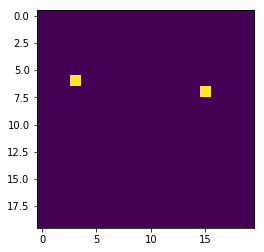

In [12]:
bbox_weights = dps[0][1]['bboxes']['weights'][0][:1200]
bbox_classes = dps[0][1]['bboxes']['classes'][0][:1200]
bbox_classes = bbox_classes.reshape([20, 20, 3])[:, :, 1]
bbox_weights = bbox_weights.reshape([20, 20, 3])[:, :, 1]
plt.imshow(bbox_classes * bbox_weights)

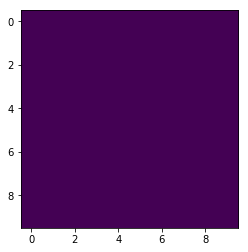

In [13]:
bbox_weights = dps[2][1]['bboxes']['feat_2']['weights'][0]
bbox_classes = dps[2][1]['bboxes']['feat_2']['classes'][0]
bbox_classes = bbox_classes.reshape([10, 10, 3])[:, :, 0]
bbox_weights = bbox_weights.reshape([10, 10, 3])[:, :, 0]
plt.imshow(bbox_classes * bbox_weights)

In [ ]:
bbox_weights = dps[0][1]['bboxes']['feat_2']['weights'][0]


In [18]:
bbox_regs = dps[1][1]['bboxes']['feat_1']['regs'][0]
bbox_regs[bbox_regs[:, 2] - bbox_regs[:, 0] > 0]

array([[0.54014605, 0.2080292 , 0.9726278 , 0.7080292 ]], dtype=float32)

In [21]:
np.argwhere(bbox_regs[:, 2] - bbox_regs[:, 0] > 0)

array([[677]])

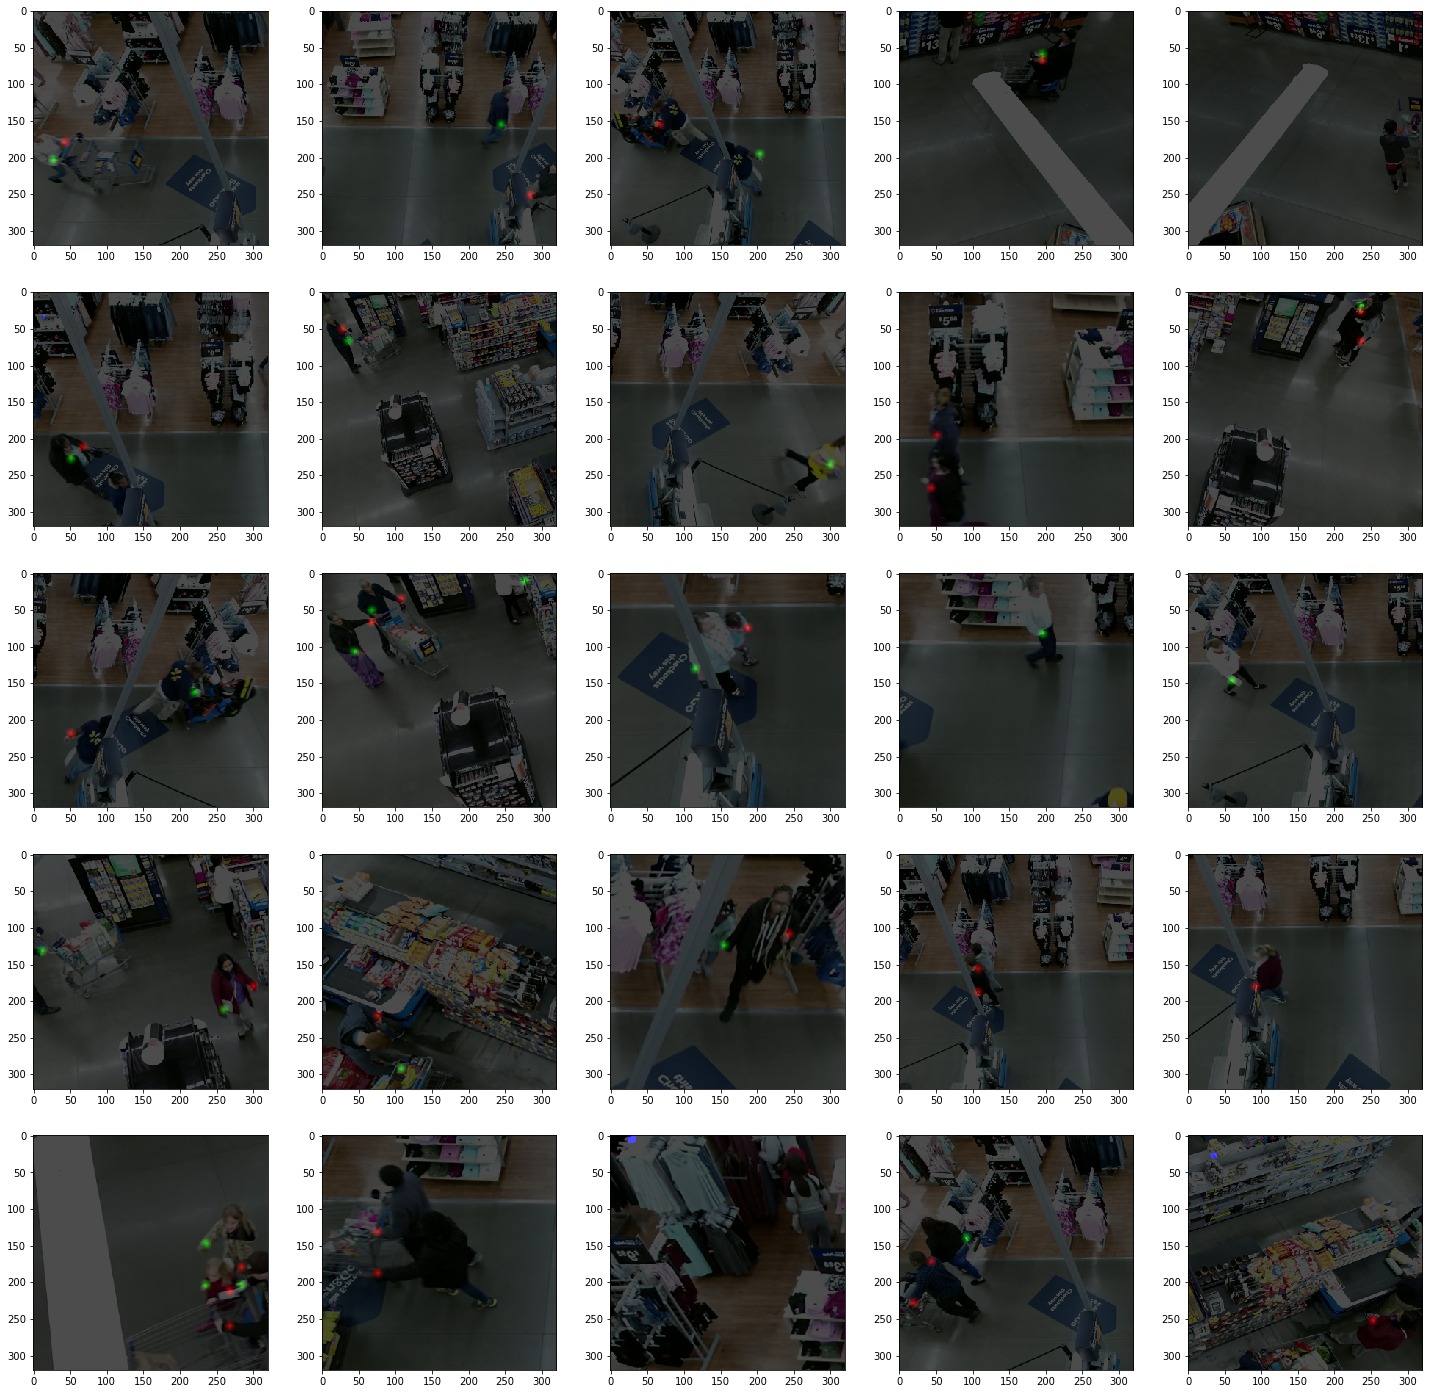

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

fig, axes = plt.subplots(5, 5, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    features, labels = dps[i]
    img = features['images'][0].astype(np.uint8)
    kp = np.zeros((40, 40, 3), dtype=np.uint8)
    kp[:, :, 0] = (255. * labels['heatmaps'][0][:, :, 0]).astype(np.uint8)
    kp[:, :, 1] = (255. * labels['heatmaps'][0][:, :, 1]).astype(np.uint8)
    kp = cv2.resize(kp, (320, 320))
    img = cv2.addWeighted(img, 0.3, kp, .7, 0)
    mask = np.where(labels['masks'][0] == 0)
    img[mask[0], mask[1], 2] = 255 
    ax.imshow(img)

In [13]:
{k: v for k, v in train_cfg.__dict__.items() if isinstance(v, (int, float, list, tuple, str
                                                               , ))}

{'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'prefetch_size': 32,
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}

In [37]:
train_cfg.__dict__

{'augmentation': {'flip_left_right': True,
  'random_crop': True,
  'scale_range': [0.5, 2.0]},
 'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'learning_rate_decay': {'decay_rate': 0.95, 'decay_steps': 10000},
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'optimizer': {'name': 'adam',
  'params': {'beta1': 0.9, 'beta2': 0.999, 'epsilon': '1e-8'}},
 'prefetch_size': 32,
 'preprocess': {'image_resize': [320, 320]},
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}